In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
day=12
month=7
#30-06-2007

In [5]:
inpath = '/media/ck/Elements/Africa/WestAfrica/cores_fromMeteosat_VERA/cores/coresPower_MSG_-40_700km2_-50points_dominant_2006_'+str(month).zfill(2)+'.nc'
das = xr.open_dataset(inpath)

In [6]:
da = das.sel(time='2006-'+str(month).zfill(2)+'-'+str(day).zfill(2)+'T13:00:00').squeeze()
da_night = das.sel(time='2006-'+str(month).zfill(2)+'-'+str(day).zfill(2)+'T01:00:00').squeeze()

In [7]:
amsre = xr.open_dataarray('/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_day/AMSR_L3_LPRMv05_A_2006'+str(month).zfill(2)+str(day).zfill(2)+'.nc').squeeze()
amsre_night = xr.open_dataarray('/home/ck/DIR/cornkle/data/OBS/AMSRE/aqua/nc_night/AMSR_L3_LPRMv05_D_2006'+str(month).zfill(2)+str(day).zfill(2)+'.nc').squeeze()

In [8]:
amsre = amsre.sel(lat=slice(4,18), lon=slice(-17.5,12))
amsre_night = amsre_night.sel(lat=slice(4,18), lon=slice(-17.5,12))

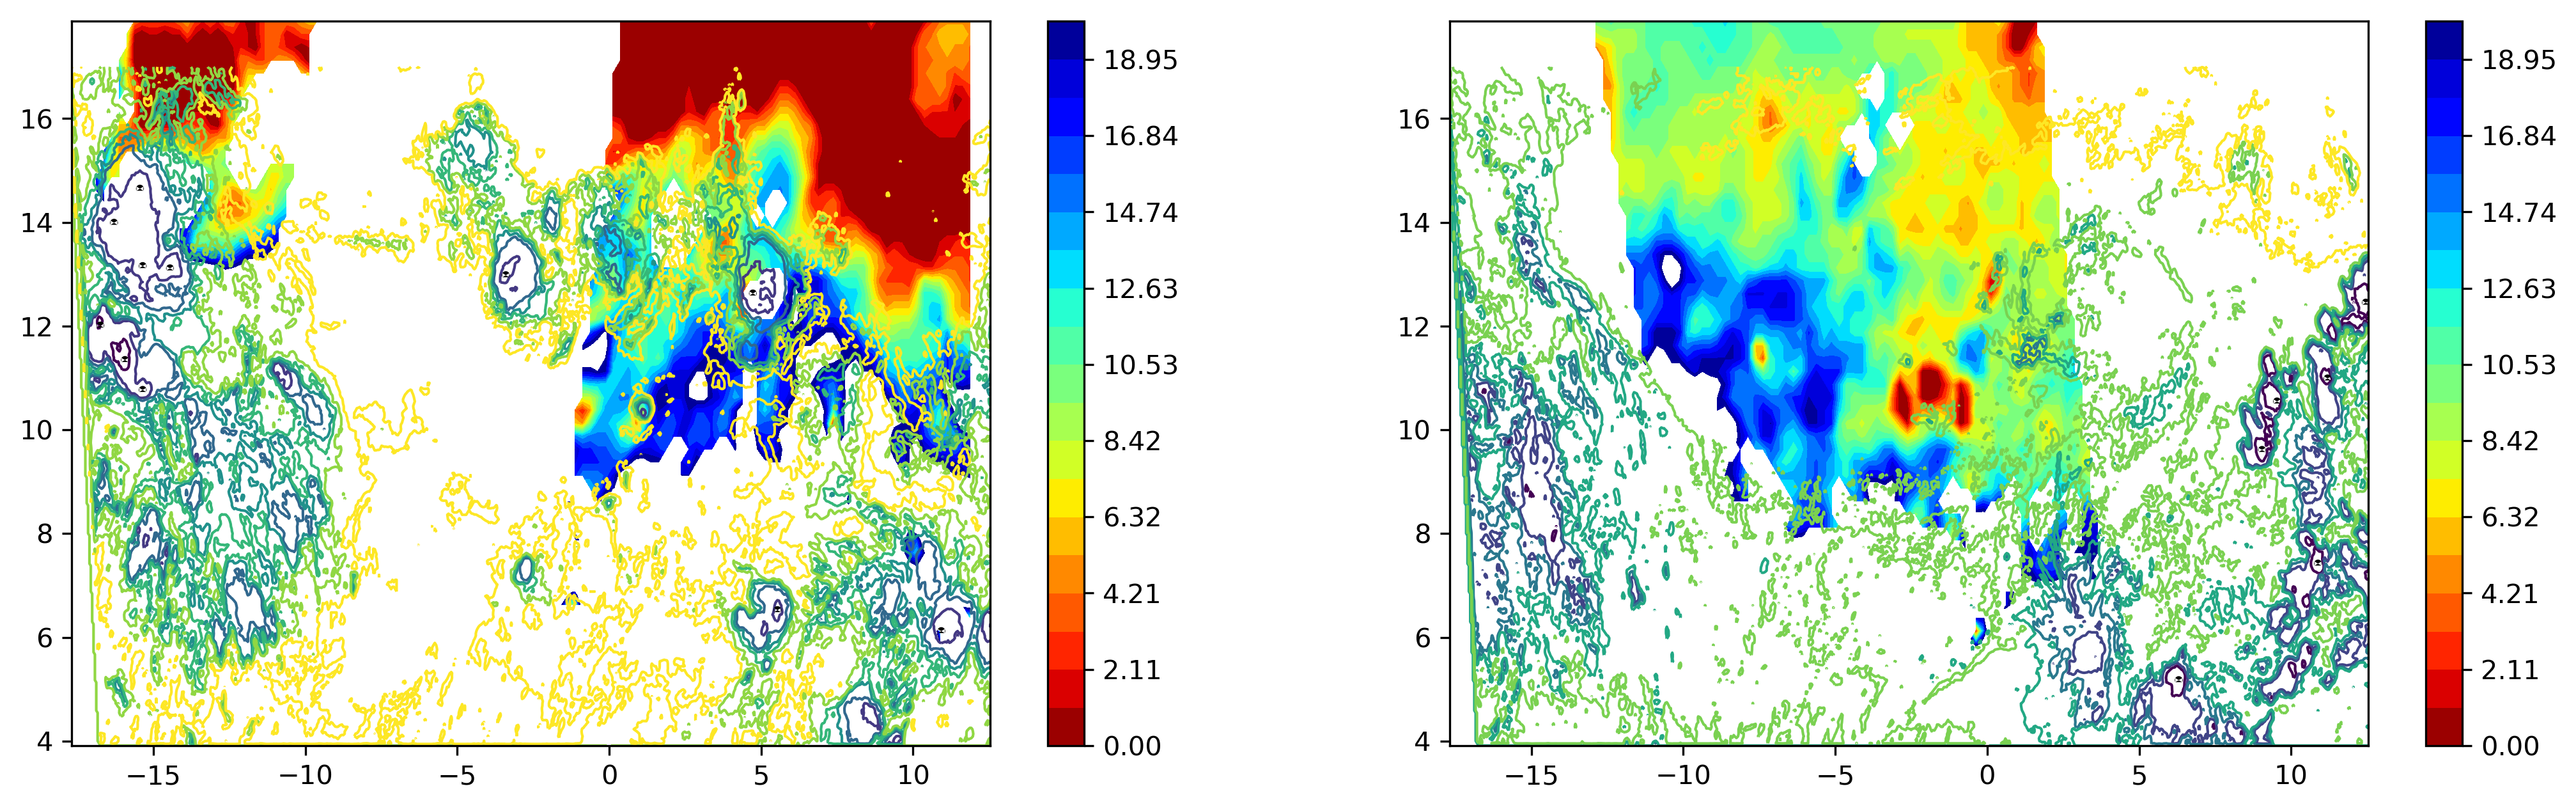

In [9]:

f = plt.figure(figsize=(17,5), dpi=300)
f.add_subplot(122)
plt.contourf(amsre.lon, amsre.lat, amsre, levels=np.linspace(0,20,20), cmap='jet_r')
plt.colorbar()
plt.contour(da['tir'].lon, da['tir'].lat, da['tir']/100, extend='both', linewidths=1, cmap='viridis')
plt.contour(da['blobs'].lon, da['blobs'].lat, da['blobs'], extend='both', linewidths=3, levels=[-1000,-999, -998], cmap='Greys_r')

f.add_subplot(121)
plt.contourf(amsre.lon, amsre.lat, amsre_night, levels=np.linspace(0,20,20), cmap='jet_r')
plt.colorbar()
plt.contour(da['tir'].lon, da['tir'].lat, da_night['tir']/100, extend='both', linewidths=1, cmap='viridis')
plt.contour(da['blobs'].lon, da['blobs'].lat, da_night['blobs'], extend='both', linewidths=3, levels=[-1000,-999, -998], cmap='Greys_r')
